In [117]:
%matplotlib inline 

In [118]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM, Embedding
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.preprocessing import sequence

import matplotlib.pyplot as plt

import csv

In [136]:
input_length = 200
nb_epoch = 15
input_dim = 256

In [137]:
rin_chan = {'hoshizora':0, 'shibuya':1, 'toosaka':2, 'matsuoka':3}
x = []
y = []
for line in csv.reader(open('../data/data.tsv'), delimiter='\t'):
    x.append(list(line[1]))
    y.append(rin_chan[line[0]])
y = np_utils.to_categorical(y)

word_dict = {}
for i, xi in enumerate(x):
    for j, xj in enumerate(xi):
        word_dict[xj]= word_dict.get(xj, len(word_dict))
        x[i][j] = word_dict[xj]

x = sequence.pad_sequences(x, input_length)

x_train = x[0:6000]
y_train = y[0:6000]

x_test = x[6000:]
y_test = y[6000:]

In [138]:
model = Sequential()
model.add(Embedding(len(word_dict), input_dim,  input_length=input_length, dropout=0.2))
model.add(LSTM(input_dim, dropout_W=0.2, dropout_U=0.2, consume_less='cpu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [139]:
history = model.fit(x_train, y_train, batch_size=200, nb_epoch=nb_epoch, validation_split=0.1, verbose=1)

Train on 5400 samples, validate on 600 samples
Epoch 1/15
5400/5400 [==============================] - 220s - loss: 1.3657 - acc: 0.3080 - val_loss: 1.3069 - val_acc: 0.4050
Epoch 2/15
5400/5400 [==============================] - 228s - loss: 1.2541 - acc: 0.4344 - val_loss: 1.1721 - val_acc: 0.5217
Epoch 3/15
5400/5400 [==============================] - 259s - loss: 1.1530 - acc: 0.5054 - val_loss: 1.0925 - val_acc: 0.5500
Epoch 4/15
5400/5400 [==============================] - 247s - loss: 1.0718 - acc: 0.5391 - val_loss: 1.0420 - val_acc: 0.5717
Epoch 5/15
5400/5400 [==============================] - 231s - loss: 0.9897 - acc: 0.5900 - val_loss: 1.0455 - val_acc: 0.5583
Epoch 6/15
5400/5400 [==============================] - 254s - loss: 0.9362 - acc: 0.6241 - val_loss: 0.9643 - val_acc: 0.5967
Epoch 7/15
5400/5400 [==============================] - 285s - loss: 0.8761 - acc: 0.6494 - val_loss: 0.9968 - val_acc: 0.5933
Epoch 8/15
5400/5400 [==============================] - 262s - l

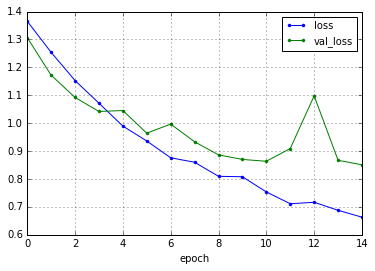

In [140]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.show()

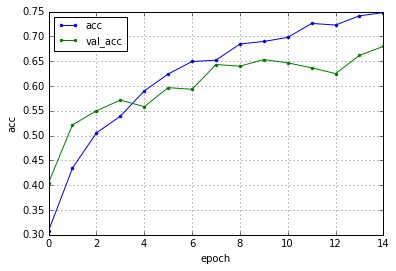

In [141]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(range(nb_epoch), acc, marker='.', label='acc')
plt.plot(range(nb_epoch), val_acc, marker='.', label='val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [142]:
model.evaluate(x_test, y_test)

1581/1581 [==============================] - 10s    


[0.87817122599205433, 0.67299177754460671]